## Malaria Detection

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 87s 1us/step


In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [6]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [37]:
# from tensorflow.keras.layers import MaxPooling2D

In [38]:
### Create Model from scratch using CNN
# model=Sequential()
# model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(500,activation="relu"))
# model.add(Dense(2,activation="softmax"))
# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [13]:
training_set

In [14]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
13/13 [==============================] - 120s 10s/step - loss: 0.3066 - accuracy: 0.8726 - val_loss: 0.6456 - val_accuracy: 0.6716
Epoch 2/15
13/13 [==============================] - 119s 9s/step - loss: 0.3301 - accuracy: 0.8678 - val_loss: 0.3794 - val_accuracy: 0.8060
Epoch 3/15
13/13 [==============================] - 124s 10s/step - loss: 0.2801 - accuracy: 0.8846 - val_loss: 0.5035 - val_accuracy: 0.7388
Epoch 4/15
13/13 [==============================] - 131s 10s/step - loss: 0.3004 - accuracy: 0.8774 - val_loss: 0.3489 - val_accuracy: 0.7985
Epoch 5/15
13/13 [==============================] - 129s 10s/step - loss: 0.2848 - accuracy: 0.8822 - val_loss: 0.3550 - val_accuracy: 0.8582
Epoch 6/15
13/13 [==============================] - 129s 10s/step - loss: 0.2182 - accuracy: 0.9135 - val_loss: 0.3176 - val_accuracy: 0.8881
Epoch 7/15
13/13 [==============================] - 120s 9s/step - loss: 0.2082 - accuracy: 0.9303 - val_loss: 0.3818 - val_accuracy: 0.8060
Epoch 8/

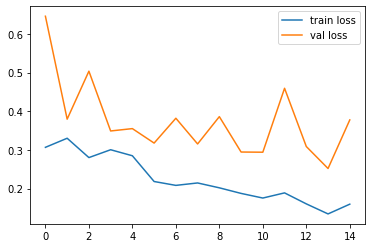

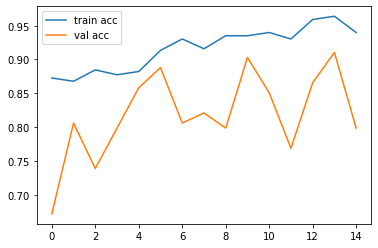

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('Malaria_Detection_vgg19.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[9.94751394e-01, 5.24867419e-03],
       [8.36568534e-01, 1.63431495e-01],
       [2.35997569e-02, 9.76400256e-01],
       [5.28331324e-02, 9.47166860e-01],
       [2.92689532e-01, 7.07310379e-01],
       [7.94255212e-02, 9.20574486e-01],
       [9.92260873e-01, 7.73910759e-03],
       [7.08227813e-01, 2.91772187e-01],
       [9.86472964e-01, 1.35270059e-02],
       [9.98718143e-01, 1.28190801e-03],
       [4.01129387e-02, 9.59887087e-01],
       [9.99100804e-01, 8.99185485e-04],
       [9.57316458e-01, 4.26835865e-02],
       [9.99958873e-01, 4.11670298e-05],
       [6.11761570e-01, 3.88238460e-01],
       [1.06855430e-01, 8.93144608e-01],
       [4.96840477e-02, 9.50315952e-01],
       [9.93143320e-01, 6.85671205e-03],
       [4.65614557e-01, 5.34385443e-01],
       [4.73192960e-01, 5.26807070e-01],
       [1.70821875e-01, 8.29178154e-01],
       [8.25891197e-01, 1.74108833e-01],
       [4.01724987e-02, 9.59827483e-01],
       [1.13721728e-01, 8.86278272e-01],
       [7.514711

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [24]:
# from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
# model=load_model('model_vgg19.h5')

In [25]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [26]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

array([[0.3003052, 0.6996949]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

In [32]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
